## Exploratory data analysis of the Irish weather

### Objective
> The obejective is to perform an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.

In [25]:
# importing the necessary packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Loading the the weather.csv dataset into Python as a pandas DataFrame
df = pd.read_csv("weather.csv")

In [27]:
# Having an overview of the dataset
df.head()

,day: day of measurement,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,month: month of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,year: year of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,station: location of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,maxtp: Maximum Air Temperature (C)\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mintp: Minimum Air Temperature (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Comment: Checking the head of the data is not giving me enough information about the dataset, so I will have a look at the whole dataset

In [28]:
# Checking the whole dataset
df

,day: day of measurement,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,month: month of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,year: year of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,station: location of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,maxtp: Maximum Air Temperature (C)\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mintp: Minimum Air Temperature (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1101,27,dec,2021,Cork Airport,8.9,6.6,3.9,10.9,32,0
1102,28,dec,2021,Cork Airport,9.3,6.7,5.3,9.1,31,0.3
1103,29,dec,2021,Cork Airport,13,7.5,11.5,13.5,35,3.5
1104,30,dec,2021,Cork Airport,12.2,11.1,24.3,16.7,37,0


> This dataset contains information about the historic weather data from Met Eireann, Ireland’s main meteorological service.
Information given about the weather includes day, month and year of measurement, location of measurement, maximum air temparature, minimum air temperature, Precipitation Amount,Mean Wind Speed, Highest Gust,	and Sunshine duration.		

> Observation: The data dictionary of the dataset was combined with the data, so I need to drop the rows which includes information about the data dictionary

In [29]:
# Checking the head to know the exact rows I am to remove
df.head(11)

,day: day of measurement,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,month: month of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,year: year of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,station: location of measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,maxtp: Maximum Air Temperature (C)\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mintp: Minimum Air Temperature (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,rain: Precipitation Amount (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,wdsp: Mean Wind Speed (knot),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,hg: Highest Gust (knot),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,sun: Sunshine duration (hours),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Dropping the rows that includes the data dictionary
df.drop([0,1,2,3,4,5,6,7,8,9], axis = 0,inplace = True)

In [31]:
# Checking if the rows were properly dropped
df.head()

,day: day of measurement,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
11,1,jan,2021,Dublin Airport,5,-1.9,0,8.8,19,6.6
12,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19,2.4
13,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30,0.6
14,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27,0.6


In [32]:
# The dataframe has an inappropiate header, so I will make the row which include day, month, ..., and sun as the first header
df.columns = df.iloc[0]
df = df [1:]

In [33]:
# Checking the header has been corrected
df.head()

10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
11,1,jan,2021,Dublin Airport,5,-1.9,0,8.8,19,6.6
12,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19,2.4
13,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30,0.6
14,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27,0.6
15,5,jan,2021,Dublin Airport,5.2,1.2,1,9.5,25,1


In [34]:
# Checking how many years of recording was included in the data set
df.nunique()

10
day         31
month       12
year         1
station      3
maxtp      232
mintp      201
rain       160
wdsp       170
hg          47
sun        146
dtype: int64

> The dataset contains only 1 year of recording.

> The following weather measurements were observed
- Temperature
- Precipitation Amount
- Mean Wind Speed
- Highest gust
- Sunshine duration

In [35]:
# Checking the null values in each column of the dataset
df.isnull().sum()

10
day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64

> The following columns has missing values :
- maxtp
- mintp
- rain
- wdsp
- hg
- sun

- The values maybe missing as a result of error from the data collector or the values missing were never measured at that particular day.
- The missing values for sunshine duration could be as a result of extreme cold weather condition and the measurement could not be taken.
- For the sunshine duration and rain, the missing values could be replaced with zero
- For maximum temperature, minimum temperature, mean wind speed and highest gust, the missing values could be replaced by their average measurement for the station which has a missing value.

In [36]:
# Checking how many different weather stations are included in the data set
df.station.value_counts()

Dublin Airport     365
Shannon Airport    365
Cork Airport       365
Name: station, dtype: int64

> There are 3 different weather stations included in the data set

In [37]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 11 to 1105
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   day      1095 non-null   object
 1   month    1095 non-null   object
 2   year     1095 non-null   object
 3   station  1095 non-null   object
 4   maxtp    1093 non-null   object
 5   mintp    1093 non-null   object
 6   rain     1091 non-null   object
 7   wdsp     1094 non-null   object
 8   hg       1092 non-null   object
 9   sun      1093 non-null   object
dtypes: object(10)
memory usage: 94.1+ KB


> Observation: Some columns have incorrect data types, so I need to correct the datatypes

In [39]:
# Correcting the incorrect data types
df.maxtp = df.maxtp.astype(float, errors = 'ignore')
df.mintp = df.mintp.astype(float, errors = 'ignore')
df.rain = df.rain.astype(float, errors = 'ignore')
df.wdsp = df.wdsp.astype(float, errors = 'ignore')
df.hg = df.hg.astype(float, errors = 'ignore')
df.sun = df.sun.astype(float, errors = 'ignore')

In [40]:
# Checking if the datatypes was corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 11 to 1105
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      1095 non-null   object 
 1   month    1095 non-null   object 
 2   year     1095 non-null   object 
 3   station  1095 non-null   object 
 4   maxtp    1093 non-null   float64
 5   mintp    1093 non-null   float64
 6   rain     1091 non-null   float64
 7   wdsp     1094 non-null   float64
 8   hg       1092 non-null   float64
 9   sun      1093 non-null   float64
dtypes: float64(6), object(4)
memory usage: 94.1+ KB


In [41]:
# writing a code to determine at what station and on what date was the lowest minimum air temperature recorded
df.nsmallest(n=1, columns=['mintp'])

10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
19,9,jan,2021,Dublin Airport,2.4,-5.9,0.0,6.5,19.0,6.8


> Observation: The lowest minimum air temperature was recorded on 9th of January, 2021 at Dublin Airport

In [42]:
#  writing a code to determine at what station and on what date was the largest amount of rain recorded?
df.nlargest(n=1, columns=['rain'])

10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
1040,27,oct,2021,Cork Airport,14.7,12.4,50.1,16.4,36.0,0.0


> Observation: The largest amount of rain was recorded on 27th of October, 2021 at Cork Airport

In [43]:
# Creating a numerical summary for each of the weather measurement
df.describe()

10,maxtp,mintp,rain,wdsp,hg,sun
count,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


> Comment for the maximum temperature.
- The total observations recorded for maximum temperature was 1093.
- The highest maximum temperature recorded was 29.60 C, while the lowest maximum temperature recorded was 0.60C.
- 25% of the recorded maximum temperature falls below 10.20C
- 50% of the recorded maximum temperature falls below 13.40C
- 75% of the recorded maximum temperature falls below 17.60C
- The average maximum temperature recorded was 13.73

> Comment for the minimum temperature.
- The total observations recorded for the minimum temperature was 1093C.
- The highest minimum temperature recorded was 18.70C, while the lowest minimum temperature recorded was -5.90C.
- 25% of the recorded minimum temperature falls below 3.40C
- 50% of the recorded minimum temperature falls below 7.10C
- 75% of the recorded minimum temperature falls below 10.70C
- The average maximum temperature recorded was 6.95C

> Comment for rain( Precipitation Amount)
- The total observations recorded for rain was 1091.
- The highest amount of rain recorded was 50.10mm, while the lowest amount of rain recorded was 0mm.
- 25% of the recorded amount of rain falls in 0mm
- 50% of the recorded amount of rain falls below 0.30mm
- 75% of the recorded amount of rain falls below 3.05mm
- The average amount of rain recorded was 2.60mm

> Comment for wdsp( Mean Wind Speed)
- The total observations recorded for mean wind speed was 1094.
- The highest amount of mean wind speed was 26.30 knot, while the lowest amount of mean wind speed recorded was 1.90 knot.
- 25% of the recorded amount of mean wind speed falls below 6.0 knot
- 50% of the recorded amount of mean wind speed falls below 7.9 knot
- 75% of the recorded amount of mean wind speed falls below 10.6 knot
- The average amount of mean wind speed recorded was 8.59 knot

> Comment for hg (Highest Gust)
- The total observations recorded for highest gust was 1092.
- The highest amount of highest gust was 64 knot, while the lowest amount of highest gust recorded was 7 knot.
- 25% of the recorded amount of highest gust falls below 17 knot
- 50% of the recorded amount of highest gust falls below 21 knot
- 75% of the recorded amount of highest gust falls below 28 knot
- The average amount of highest gust recorded was 22.86 knot

> Comment for Sunshine duration (hours)
- The total observations recorded for sunshine duration was 1093.
- The highest sunshine duration was 15 hours, while the lowest sunshine duration recorded was 0 hours.
- 25% of the recorded sunshine duration falls below 0.3 hours
- 50% of the recorded sunshine duration falls below 2.9 hours
- 75% of the recorded sunshine duration falls below 6.6 hours 
- The average sunshine duration recorded was 4 hours

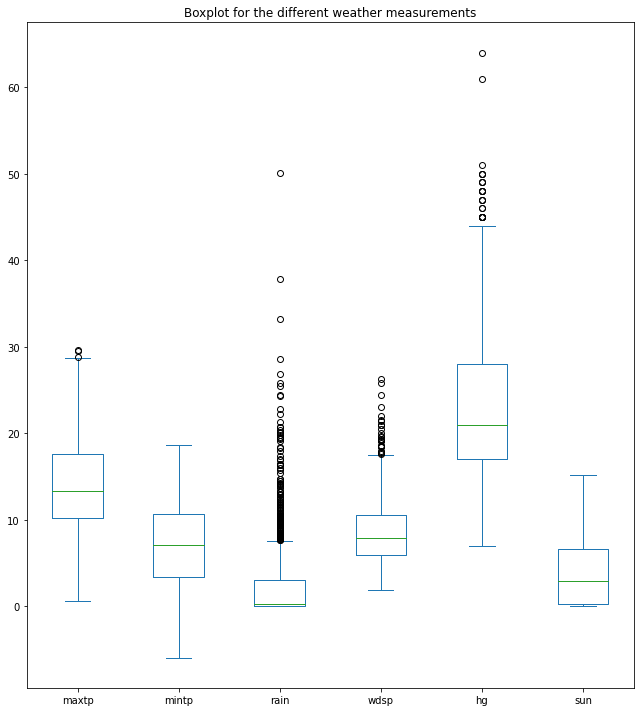

In [44]:
# Creating a box plot for the different weather measurements
plt.rcParams["figure.figsize"] = [9, 10]
plt.rcParams["figure.autolayout"] = True
b = df[['maxtp', 'mintp', 'rain', 'wdsp', 'hg', 'sun']].plot(kind='box', title='Boxplot for the different weather measurements')

> Comments on the box plot for the different weather measurements: 
- For maximum temperature, There are few outliers which includes the highest maximum temperature seen in the statistical summary. The size of the box plot confirms that the maximum temperature data are fairly similar.

- For minimum temperature, there are no outliers for minimum temperature and also the size the box plot confirms the minimum temaperature are fairly similar.

- For amount of rain, There are many outliers which includes the highest amount of rain seen in the statistical summary. The size of the box plot confirms that the rain measured are not similar, that is the data spread out.

- For the amount of mean wind speed, there are also outliers which include the highest amount of mean wind speed seen in the statistical summary, The size of the box plot indicates that the mean wind speed data are not similar.

- For the amount of highest gust, there are few outliers which include the maximum amount of highest gust seen in the statitical summary. The size of the box plot indicates that the highest gust data are mostly similar.

- For sunshine duration, there are no outliers and the size of the box plot indicates that the data are fairly similar

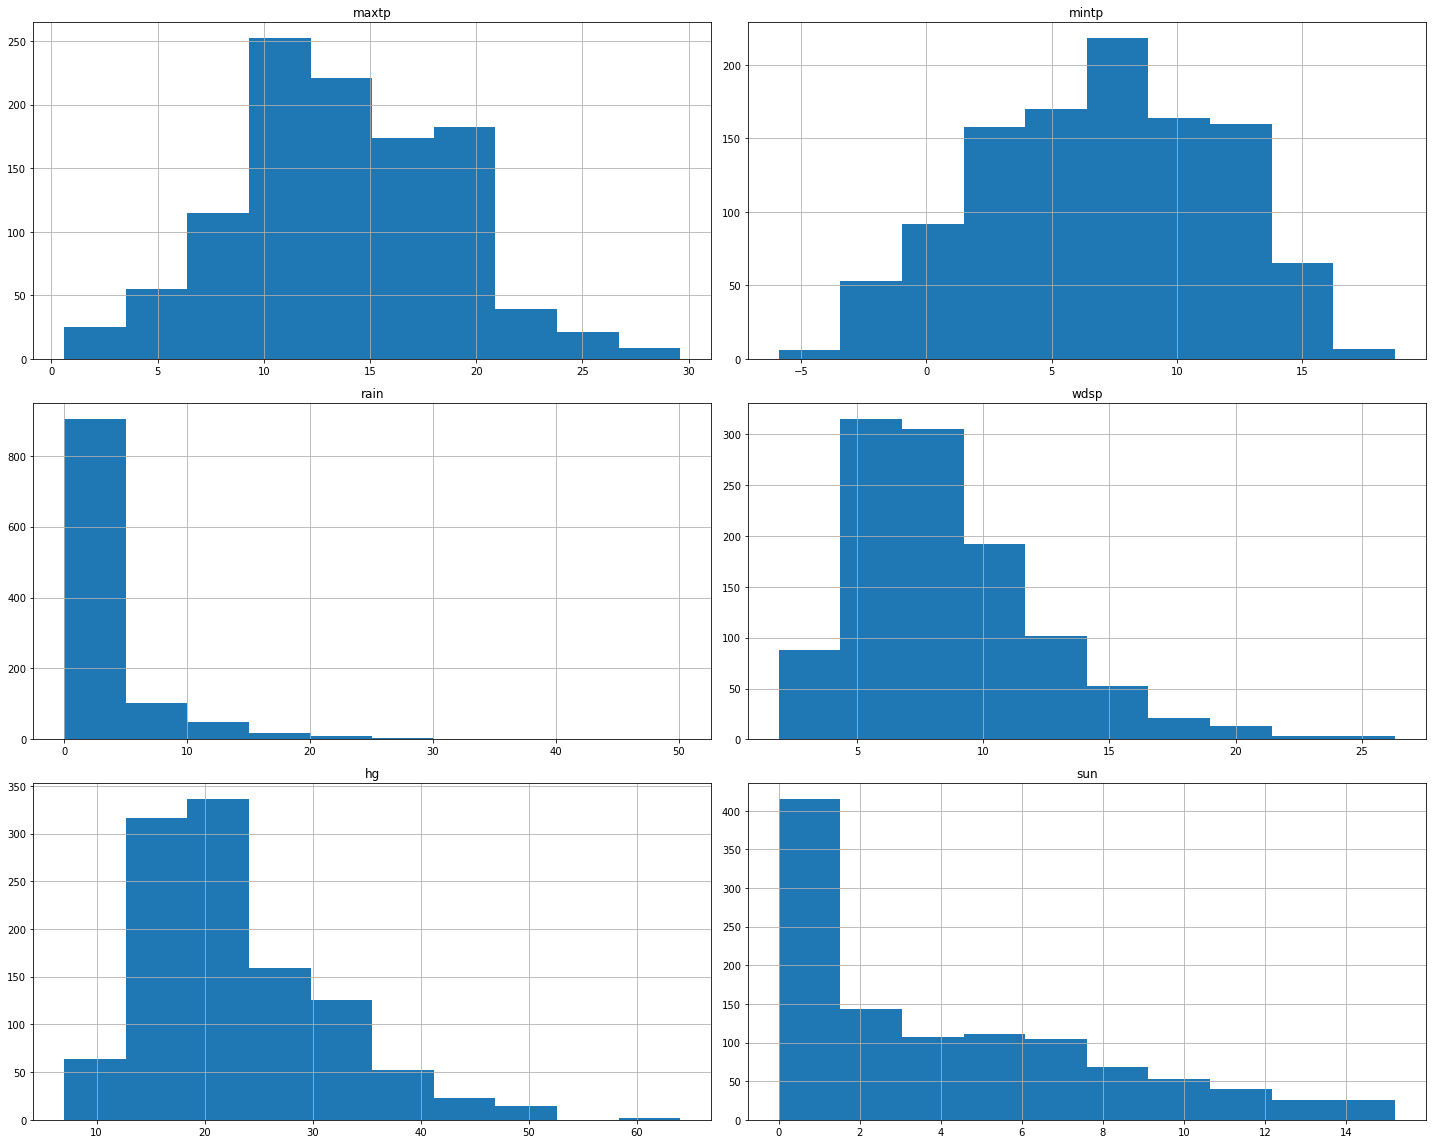

In [45]:
# Plotting an histogram for the different weather measurements

df.hist(figsize=(20,16));

> The histogram plot confirms the following about the weather measurements:
- Maximum temperature, rain, mean wind speed, highest gust and sunshine duration are all positively skewed while minimum temperature is negatively skewed

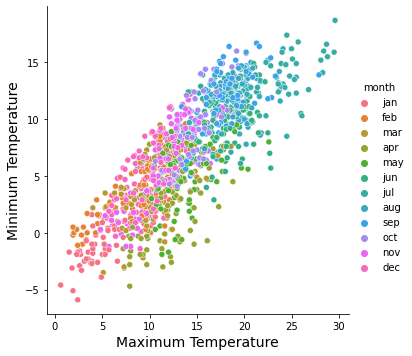

In [46]:
# Creating a scatter plot to determine relationship between the maximum temperature versus the minimum temperature based on month
sns.relplot(x="maxtp", y="mintp", data=df, hue='month')
plt.xlabel('Maximum Temperature',fontsize=14)
plt.ylabel('Minimum Temperature',fontsize=14);

> Comment: The relationship between maximum temperature and minimum temperature does not differ based on month.

In [47]:
# Computing the daily temperature range, and adding it as an additional variable to my DataFrame
df['t_range'] = df.maxtp - df.mintp
# Checking if the new column has been added
df.head()

C:\Users\sofiy\AppData\Local\Temp/ipykernel_10000/3456356175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_range'] = df.maxtp - df.mintp


10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,t_range
11,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
12,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
13,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
14,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
15,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


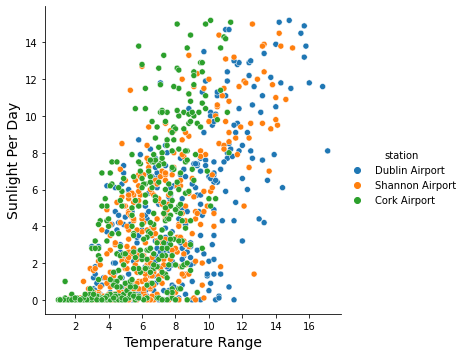

In [48]:
# Plotting the daily temperature range versus the hours of sunlight per day,  based on the weather station
sns.relplot(x="t_range", y="sun", data=df, hue='station')
plt.xlabel('Temperature Range',fontsize=14)
plt.ylabel('Sunlight Per Day',fontsize=14);

> Comment: The relationship between temperature range and sunlight per day does not differ based on station.

In [49]:
# Subsetting the data so it contains only Dublin Airport as the location of measurement
df_dublin_airport = df.loc[df.station == 'Dublin Airport']
# Checking if the data was properly filtered
df_dublin_airport.head()

10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,t_range
11,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
12,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
13,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
14,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
15,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


In [50]:
# Creating a numerical summary for the different weather measurements in Dublin Airport.

df_dublin_airport.describe()

10,maxtp,mintp,rain,wdsp,hg,sun,t_range
count,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000,364.000000
mean,13.590934,6.001099,1.828846,8.625753,22.623626,4.089835,7.589835
std,5.258806,4.748774,3.878082,3.456376,7.790196,3.981802,3.199411
min,1.500000,-5.900000,0.000000,2.600000,10.000000,0.000000,1.400000
25%,10.000000,2.000000,0.000000,6.100000,17.000000,0.500000,5.200000
50%,13.300000,6.200000,0.100000,7.900000,21.000000,2.900000,7.350000
75%,18.100000,9.900000,1.325000,10.500000,27.250000,6.800000,9.800000
max,26.800000,15.800000,26.900000,24.400000,50.000000,15.200000,17.100000


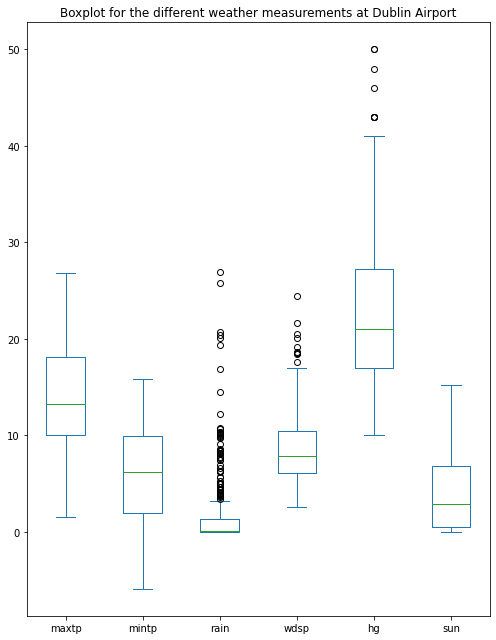

In [51]:
# Plotting a box plot for the different weather measurements at Dublin Airport

plt.rcParams["figure.figsize"] = [7, 9]
plt.rcParams["figure.autolayout"] = True
d = df_dublin_airport[['maxtp', 'mintp', 'rain', 'wdsp', 'hg', 'sun']].plot(kind='box', title='Boxplot for the different weather measurements at Dublin Airport')

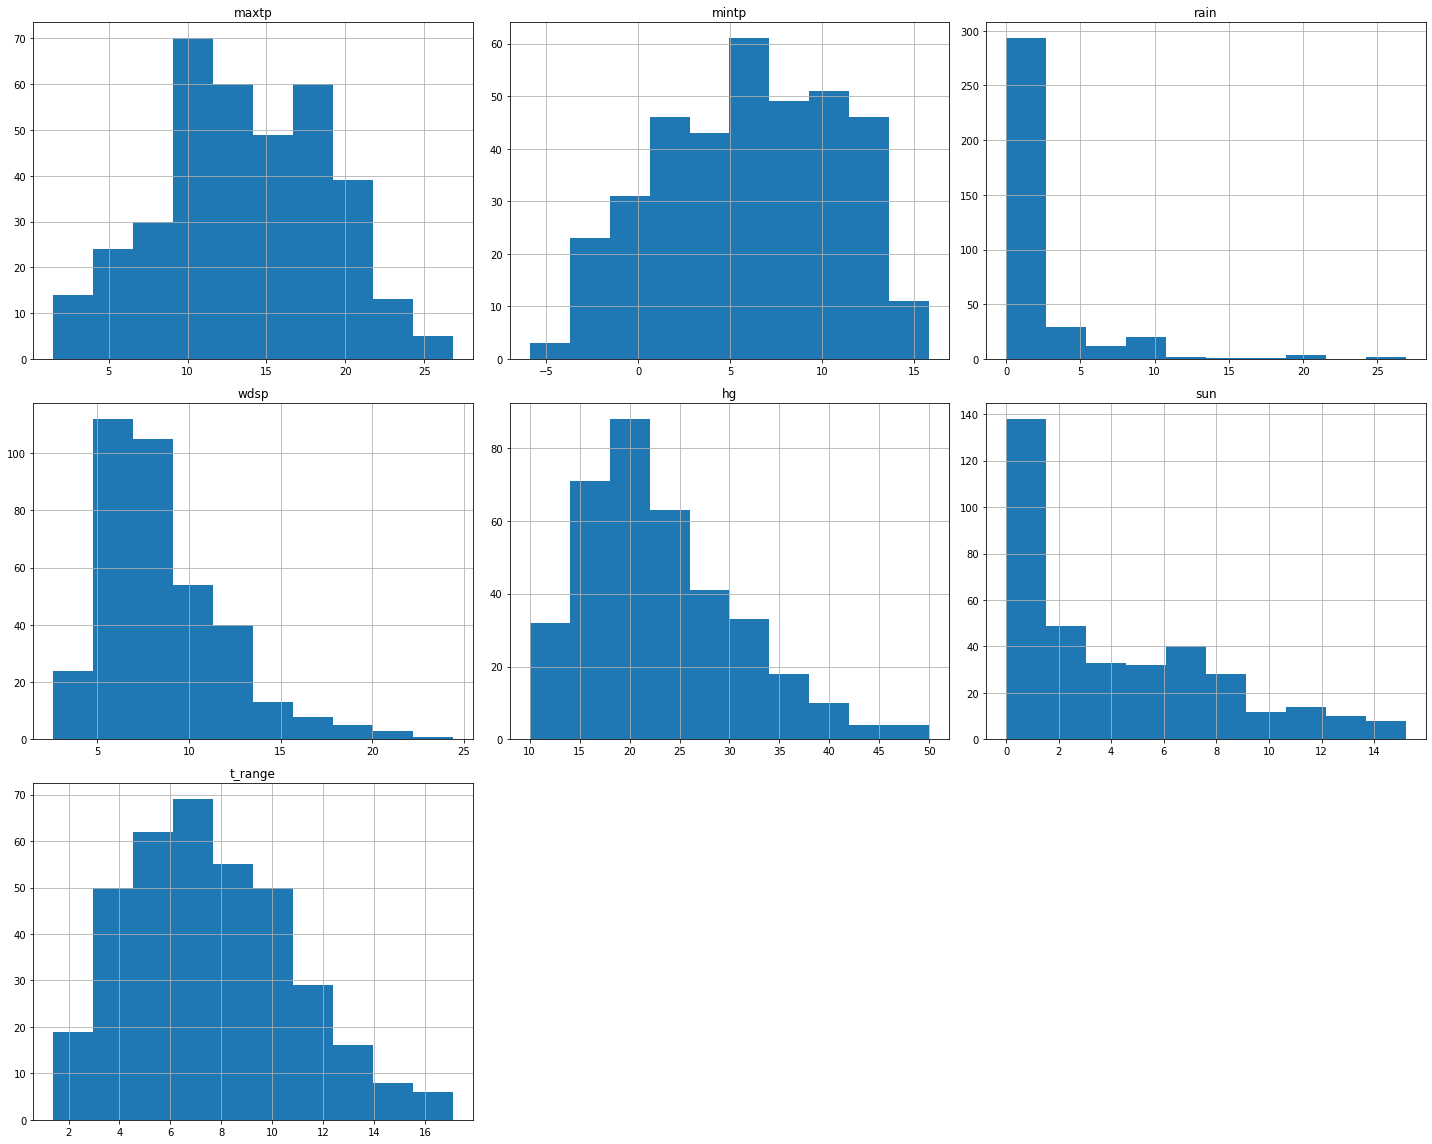

In [52]:
# Plotting an histogram for the different weather measurements at Dublin Airport

df_dublin_airport.hist(figsize=(20,16));

In [53]:
# Subsetting the data so it contains only Shannon Airport as the location of measurement
df_shannon_airport = df.loc[df.station == 'Shannon Airport']
# Checking if the data was properly filtered
df_shannon_airport.head()

10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,t_range
376,1,jan,2021,Shannon Airport,6.5,-1.1,0.0,6.0,16.0,5.2,7.6
377,2,jan,2021,Shannon Airport,6.6,-2.5,0.1,4.2,14.0,0.1,9.1
378,3,jan,2021,Shannon Airport,2.6,-2.9,0.1,4.0,12.0,5.3,5.5
379,4,jan,2021,Shannon Airport,3.1,-2.5,0.1,7.7,19.0,2.5,5.6
380,5,jan,2021,Shannon Airport,4.2,-1.0,0.0,6.2,17.0,4.8,5.2


In [54]:
# Creating a numerical summary for the different weather measurements in Shannon Airport.
df_shannon_airport.describe()

10,maxtp,mintp,rain,wdsp,hg,sun,t_range
count,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,14.368681,7.611813,2.549041,7.815342,21.796143,3.856044,6.756868
std,5.175728,4.820239,4.007511,3.575878,8.372032,3.817264,2.834320
min,0.600000,-4.600000,0.000000,1.900000,8.000000,0.000000,1.700000
25%,11.100000,4.275000,0.000000,5.400000,16.000000,0.400000,4.800000
50%,14.100000,7.650000,0.500000,6.900000,20.000000,2.700000,6.300000
75%,18.000000,11.525000,3.400000,9.700000,26.000000,6.200000,8.425000
max,29.600000,18.700000,20.700000,25.800000,61.000000,15.000000,15.000000


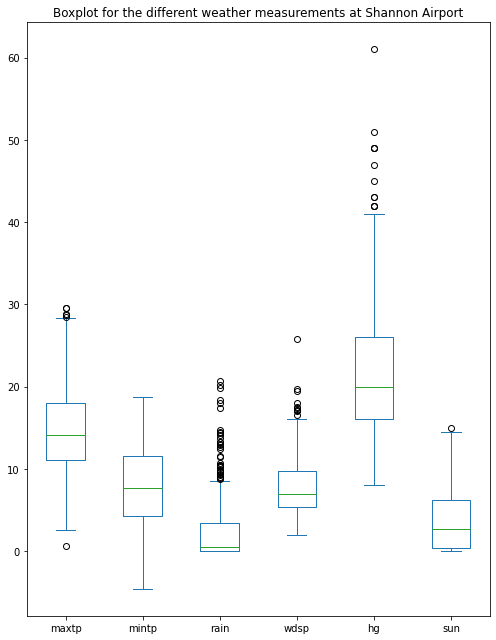

In [55]:
# Plotting a box plot for the different weather measurements at Shannon Airport
plt.rcParams["figure.figsize"] = [7, 9]
plt.rcParams["figure.autolayout"] = True
d = df_shannon_airport[['maxtp', 'mintp', 'rain', 'wdsp', 'hg', 'sun']].plot(kind='box', title='Boxplot for the different weather measurements at Shannon Airport')

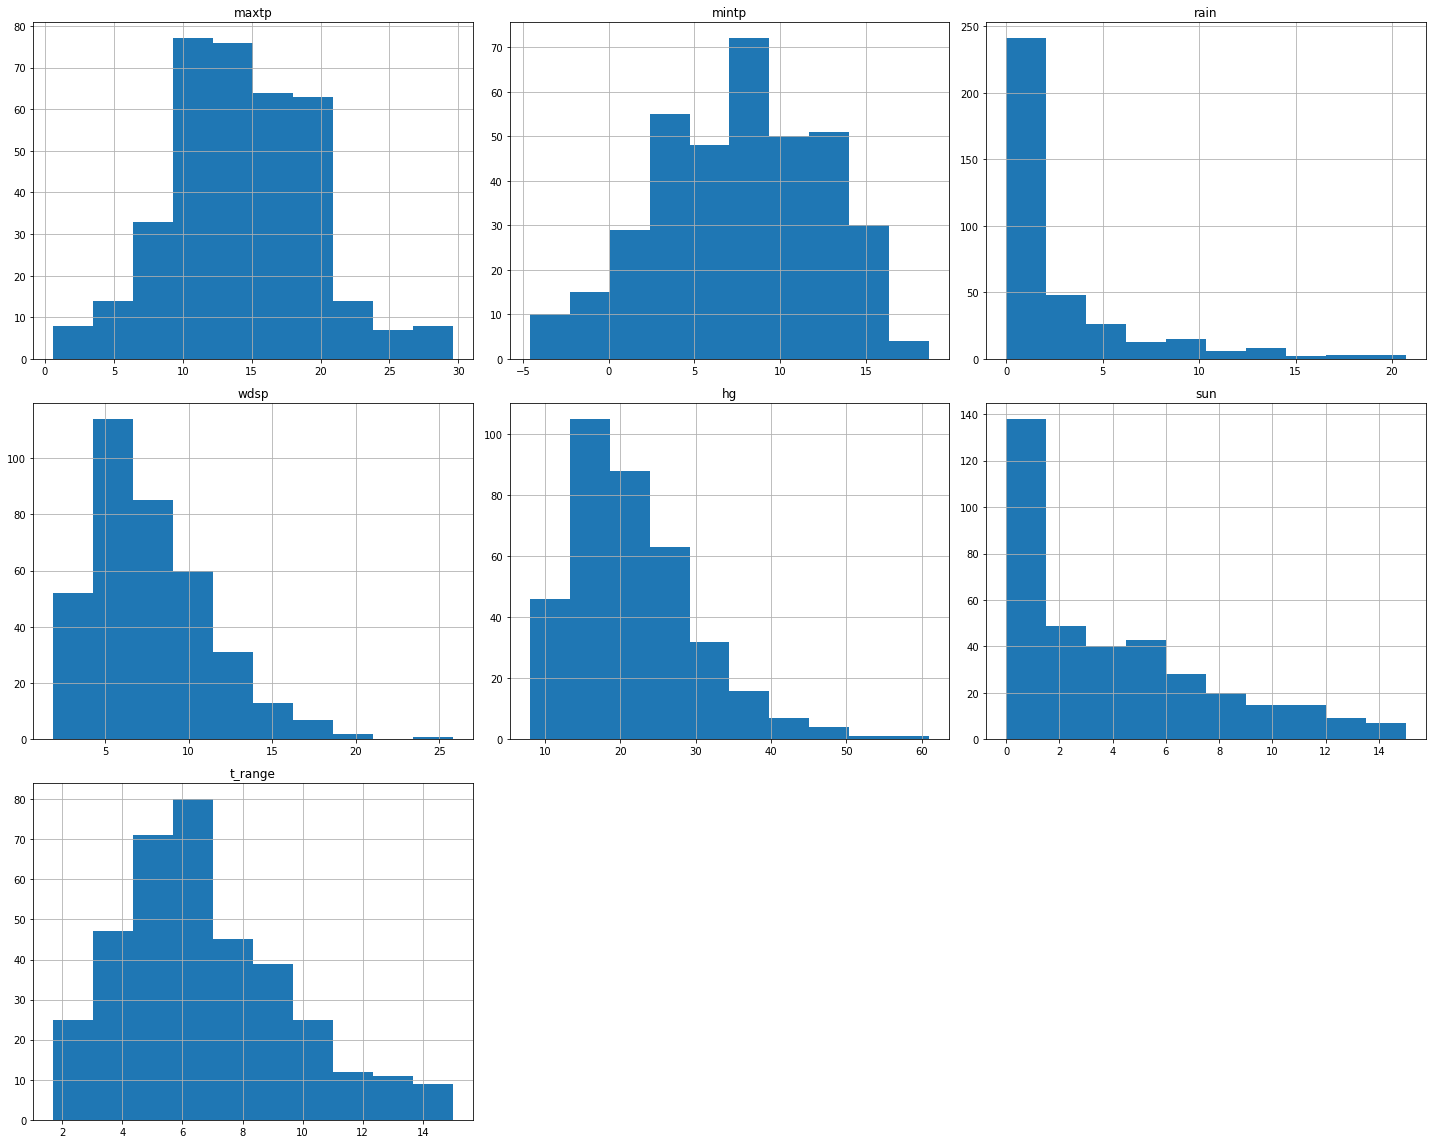

In [56]:
# Plotting an histogram for the different weather measurements at Shannon Airport
df_shannon_airport.hist(figsize=(20,16));

In [57]:
# Subsetting the data so it contains only Cork Airport as the location of measurement
df_cork_airport = df.loc[df.station == 'Cork Airport']
# Checking if the data was properly filtered
df_cork_airport.head()

10,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,t_range
741,1,jan,2021,Cork Airport,5.0,0.9,0.0,12.1,28.0,6.9,4.1
742,2,jan,2021,Cork Airport,5.1,-0.4,0.1,8.8,17.0,0.2,5.5
743,3,jan,2021,Cork Airport,2.6,-1.6,0.1,10.8,21.0,6.3,4.2
744,4,jan,2021,Cork Airport,3.3,-0.7,0.0,10.8,22.0,4.0,4.0
745,5,jan,2021,Cork Airport,4.0,0.6,0.0,10.2,20.0,2.8,3.4


In [58]:
# Creating a numerical summary for the different weather measurements at Cork Airport.
df_cork_airport.describe()

10,maxtp,mintp,rain,wdsp,hg,sun,t_range
count,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000,365.000000
mean,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110,6.003288
std,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572,2.342826
min,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000,1.000000
25%,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000,4.300000
50%,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000,6.200000
75%,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000,7.800000
max,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000,11.300000


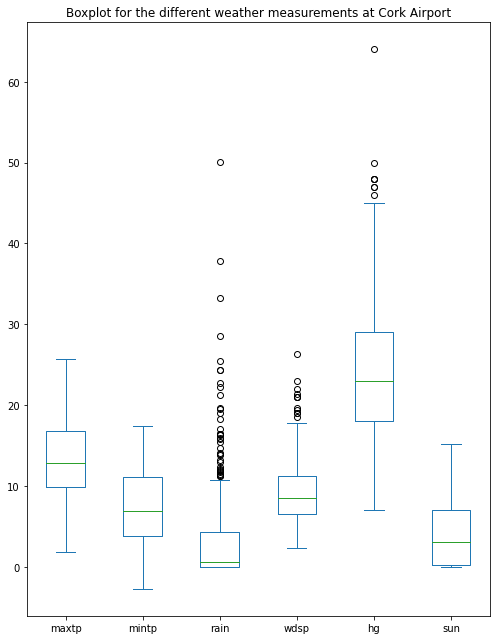

In [59]:
# Plotting a box plot for the different weather measurements at Cork Airport
plt.rcParams["figure.figsize"] = [7, 9]
plt.rcParams["figure.autolayout"] = True
d = df_cork_airport[['maxtp', 'mintp', 'rain', 'wdsp', 'hg', 'sun']].plot(kind='box', title='Boxplot for the different weather measurements at Cork Airport')

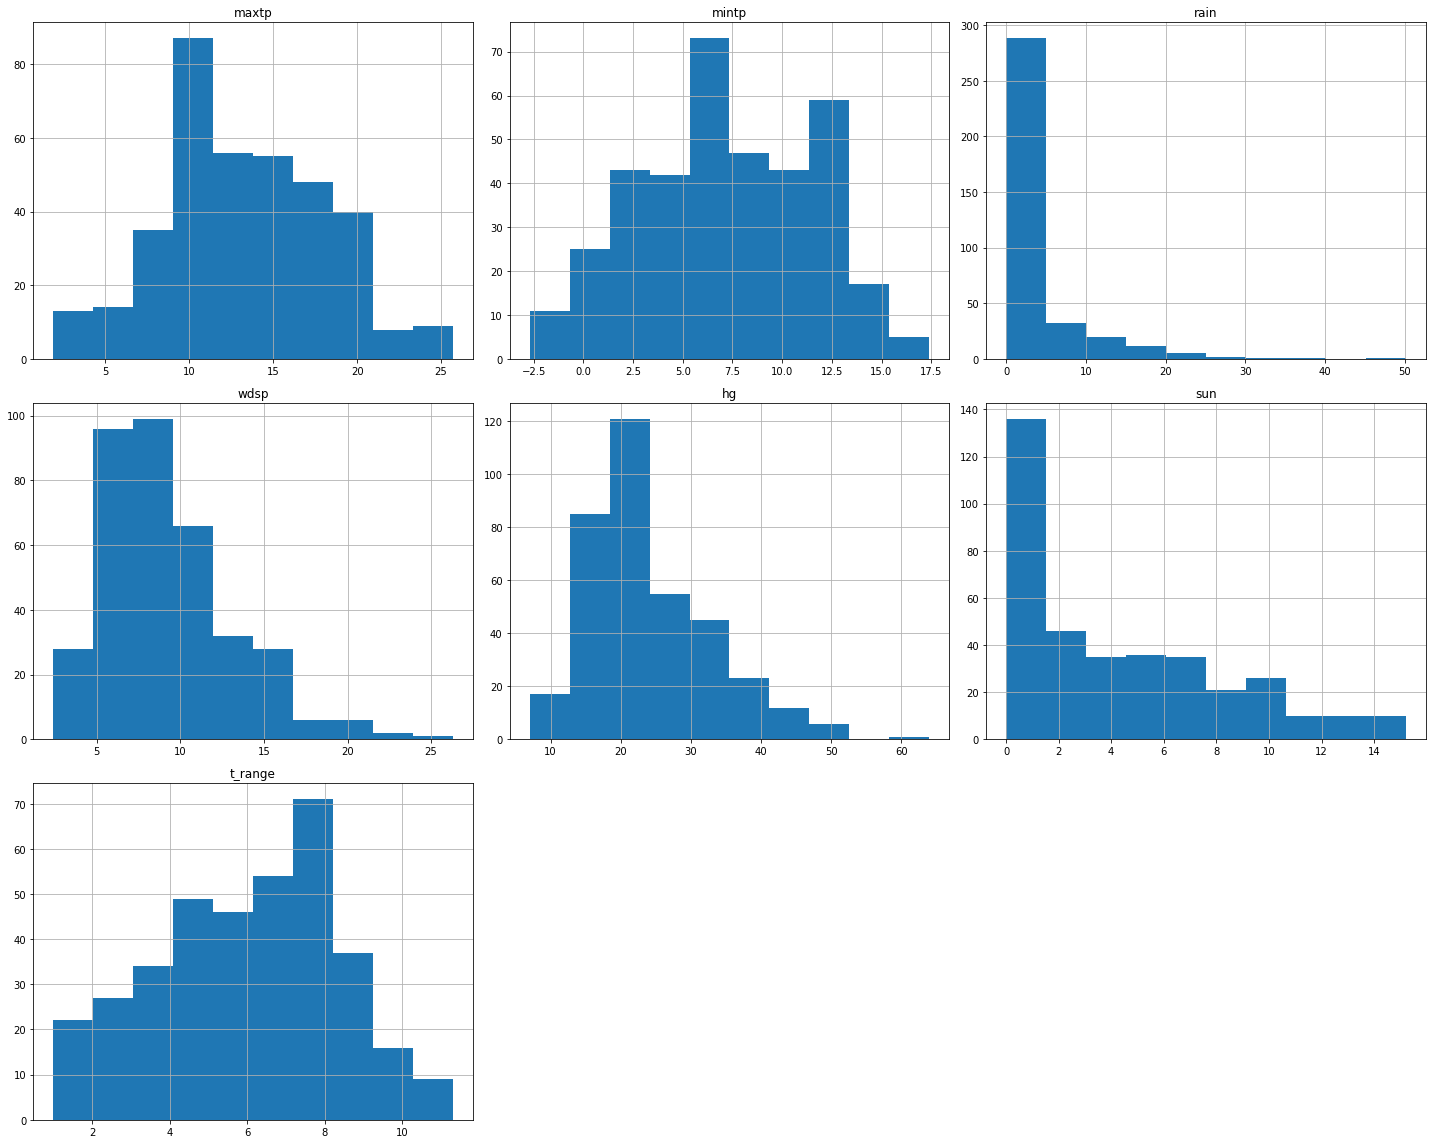

In [60]:
# Plotting an histogram for the different weather measurements at Cork Airport
df_cork_airport.hist(figsize=(20,16));

### comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport
- The maximum temperature for all the stations are positively skewed.
- The minimum temperature for all the stations are negatively skewed
- The amount of rain recorded for all the stations are positively skewed
- The amount of mean wind recorded for all the stations are positively skewed.
- The amount of highest gust recorded for all the stations are positively skewed
- The sunshine duration for all the stations are positively skewed.
- Shannon airport has the highest maximum temperature and minimum temperature, however all the stations has a similar record for the highest maximum temperature.
- The highest amount of rain was recorded at Cork Aiport, this is relatively bigger than the amount of rain recorded in Shannon and Dublin Airport.
- The maximum highest gust measurement for Cork Airport was higher than Dublin and Shannon Airport.
- The maximum sunshine duration for all stations are similar, with approximately 15 hours of sun per day. 